In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/london-bike-sharing-dataset/london_merged.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### 데이터 불러오기

In [3]:
df=pd.read_csv("../input/london-bike-sharing-dataset/london_merged.csv",parse_dates=['timestamp']) # 데이터의 timestamp 컬럼을 date으로 설정
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [4]:
# 데이터의 타입과 구조
print("데이터의 구조: ",df.shape)
print("데이터의 타입: ",df.dtypes)
print("데이터의 컬럼: ",df.columns)

데이터의 구조:  (17414, 10)
데이터의 타입:  timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object
데이터의 컬럼:  Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')


In [5]:
# 결측치
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

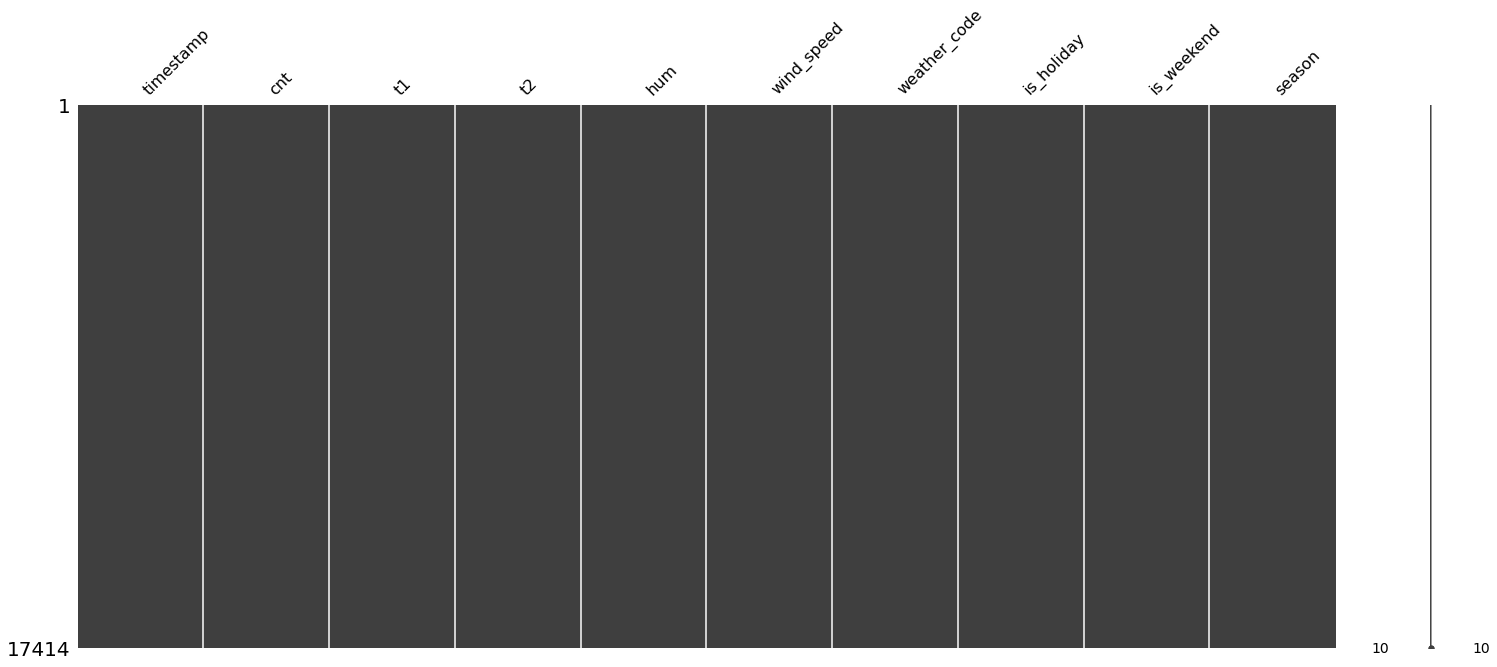

In [6]:
# 결측치 시각화
msno.matrix(df)
plt.show()

In [7]:
# 새로운 변수 생성
df['year']=df['timestamp'].dt.year # 연도
df['month']=df['timestamp'].dt.month # 달
df['dayofweek']=df['timestamp'].dt.dayofweek # 요일
df['hour']=df['timestamp'].dt.hour # 시간
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,dayofweek,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,6,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,6,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,6,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,6,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,6,4


In [8]:
# 탐색적 분석
df['year'].value_counts()

2016    8699
2015    8643
2017      72
Name: year, dtype: int64

In [9]:
df['month'].value_counts()

5     1488
1     1487
8     1484
12    1484
7     1481
10    1479
3     1468
4     1438
11    1430
6     1422
9     1394
2     1359
Name: month, dtype: int64

In [10]:
df['dayofweek'].value_counts()

0    2508
6    2505
1    2505
3    2492
2    2489
5    2465
4    2450
Name: dayofweek, dtype: int64

In [11]:
df['hour'].value_counts()

16    730
12    729
15    729
18    728
17    728
13    728
14    728
20    727
19    727
9     727
11    727
21    726
6     726
7     726
22    725
10    725
0     724
1     724
8     724
23    722
5     721
4     721
3     721
2     721
Name: hour, dtype: int64

그래프를 통한 기초 데이터 분석

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='year', ylabel='cnt'>

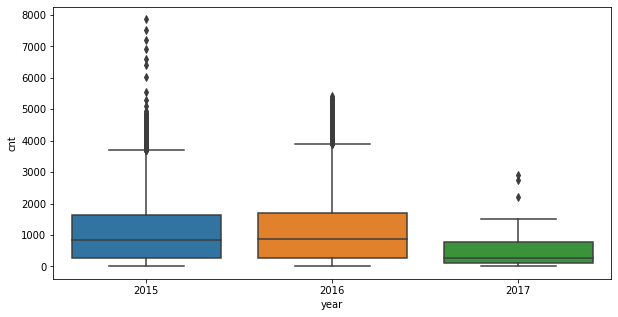

In [12]:
a,b=plt.subplots(1,1,figsize=(10,5))
sns.boxplot(df['year'],df['cnt'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='month', ylabel='cnt'>

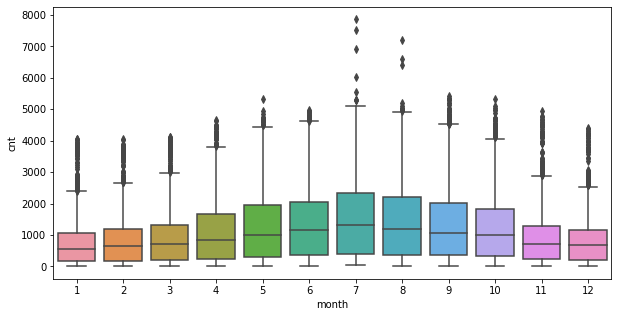

In [13]:
a,b=plt.subplots(1,1,figsize=(10,5))
sns.boxplot(df['month'],df['cnt'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='dayofweek', ylabel='cnt'>

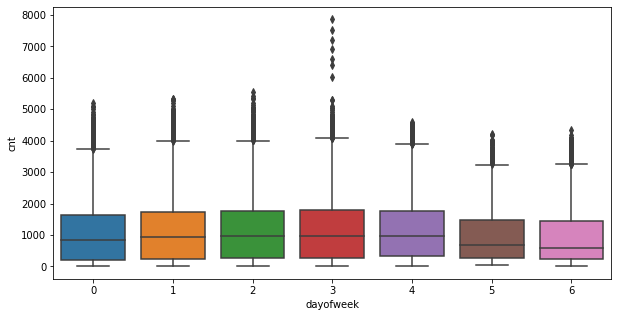

In [14]:
a,b=plt.subplots(1,1,figsize=(10,5))
sns.boxplot(df['dayofweek'],df['cnt'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='hour', ylabel='cnt'>

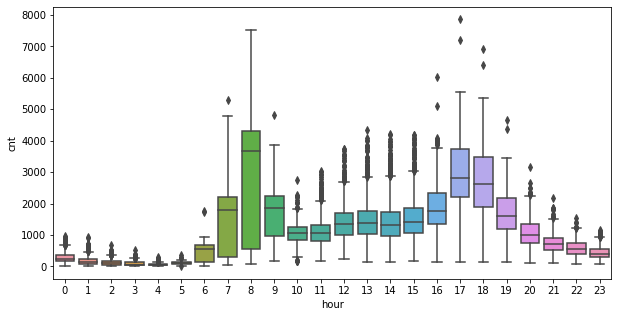

In [15]:
a,b=plt.subplots(1,1,figsize=(10,5))
sns.boxplot(df['hour'],df['cnt']) # 출퇴근 시간에 증가

In [16]:
# 그래프 함수 만들기

def plot_bar(data,feature):
    fig=plt.figure(figsize=(12,3))
    sns.barplot(x=feature,y='cnt',data=data,palette='Set3')

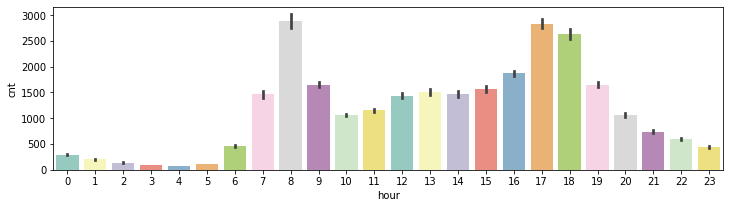

In [17]:
plot_bar(df,'hour')

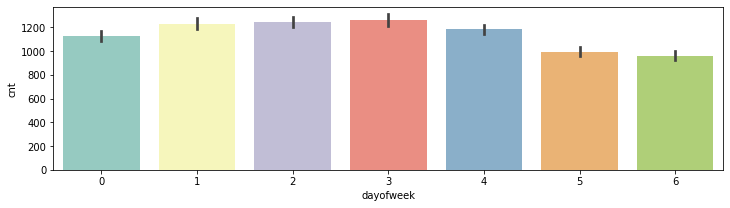

In [18]:
plot_bar(df,'dayofweek')

In [19]:
# outlier 제거 - 시그마 방법 사용


def is_outliers(s):
    lower_limit=s.mean()-s.std()*3
    upper_limit=s.mean()+s.std()*3
    return ~s.between(lower_limit,upper_limit)

In [20]:
df_out=df[~df.groupby('hour')['cnt'].apply(is_outliers)]
print("이상치 제거 전: ",df.shape)
print("이상치 제거 후: ",df_out.shape)

이상치 제거 전:  (17414, 14)
이상치 제거 후:  (17265, 14)


In [21]:
df_out.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
year                     int64
month                    int64
dayofweek                int64
hour                     int64
dtype: object

In [22]:
# category 변환
df_out['weather_code']=df_out['weather_code'].astype("category")
df_out['season']=df_out['season'].astype("category")
df_out['year']=df_out['year'].astype("category")
df_out['month']=df_out['month'].astype("category")
df_out['hour']=df_out['hour'].astype("category")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [23]:
df_out.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code          category
is_holiday             float64
is_weekend             float64
season                category
year                  category
month                 category
dayofweek                int64
hour                  category
dtype: object

In [24]:
# dummy 처리
df_out=pd.get_dummies(df_out,columns=['weather_code','season','year','month','hour'])
df_out.head()

,timestamp,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,dayofweek,weather_code_1.0,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,0.0,1.0,6,0,...,0,0,0,0,0,0,0,0,0,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,0.0,1.0,6,1,...,0,0,0,0,0,0,0,0,0,0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,0.0,1.0,6,1,...,0,0,0,0,0,0,0,0,0,0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,0.0,1.0,6,1,...,0,0,0,0,0,0,0,0,0,0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,0.0,1.0,6,1,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df_out.shape

(17265, 59)

In [26]:
df_y=df_out['cnt']
df_x=df_out.drop(['timestamp','cnt'],axis=1)
df_x.head()

,t1,t2,hum,wind_speed,is_holiday,is_weekend,dayofweek,weather_code_1.0,weather_code_2.0,weather_code_3.0,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,3.0,2.0,93.0,6.0,0.0,1.0,6,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,2.5,93.0,5.0,0.0,1.0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.5,2.5,96.5,0.0,0.0,1.0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,100.0,0.0,0.0,1.0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,0.0,93.0,6.5,0.0,1.0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df_y.head()

0    182
1    138
2    134
3     72
4     47
Name: cnt, dtype: int64

In [28]:
# 훈련용, 테스트용 데이터 분리

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,random_state=60,test_size=0.3,shuffle=False) # 시간 데이터니까 shuffle false

In [29]:
print("x_train의 구조는: ",x_train.shape)
print("y_train의 구조는: ",y_train.shape)
print()
print("x_test의 구조는: ",x_test.shape)
print("y_test의 구조는: ",y_test.shape)

x_train의 구조는:  (12085, 57)
y_train의 구조는:  (12085,)

x_test의 구조는:  (5180, 57)
y_test의 구조는:  (5180,)


딥러닝

In [30]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [31]:
model=Sequential()
model.add(Dense(units=160,activation='relu',input_dim=57))
model.add(Dense(units=60,activation='relu'))
model.add(Dense(units=20,activation='relu'))
model.add(Dense(units=1,activation='linear'))


User settings:

   KMP_AFFINITY=granularity=fine,noverbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 160)               9280      
_________________________________________________________________
dense_1 (Dense)              (None, 60)                9660      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                1220      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 20,181
Trainable params: 20,181
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(loss='mae',optimizer='adam',metrics=['mae'])
early_stopping=EarlyStopping(monitor='loss',patience=5,mode='min') # 과적합이 되기 전 stop
history=model.fit(x_train,y_train,epochs=50,batch_size=1,validation_split=0.1,callbacks=[early_stopping])

2022-02-04 14:00:15.086202: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
10876/10876 [==============================] - 31s 3ms/step - loss: 515.5089 - mae: 515.5089 - val_loss: 414.1768 - val_mae: 414.1768
Epoch 2/50
10876/10876 [==============================] - 31s 3ms/step - loss: 320.1397 - mae: 320.1397 - val_loss: 331.6360 - val_mae: 331.6360
Epoch 3/50
10876/10876 [==============================] - 32s 3ms/step - loss: 248.1857 - mae: 248.1857 - val_loss: 246.9066 - val_mae: 246.9066
Epoch 4/50
10876/10876 [==============================] - 32s 3ms/step - loss: 210.3329 - mae: 210.3329 - val_loss: 216.9593 - val_mae: 216.9593
Epoch 5/50
10876/10876 [==============================] - 32s 3ms/step - loss: 183.9807 - mae: 183.9807 - val_loss: 178.2252 - val_mae: 178.2252
Epoch 6/50
10876/10876 [==============================] - 29s 3ms/step - loss: 168.8013 - mae: 168.8013 - val_loss: 189.2894 - val_mae: 189.2894
Epoch 7/50
10876/10876 [==============================] - 25s 2ms/step - loss: 158.8599 - mae: 158.8599 - val_loss: 201.0279 - val

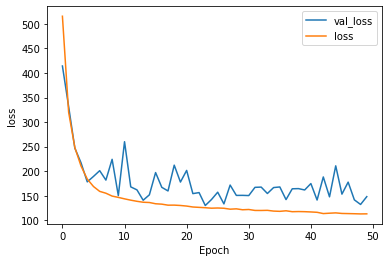

In [34]:
# 시각화
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['val_loss','loss'])
plt.show()

In [35]:
y_predict=model.predict(x_test)

In [36]:
from sklearn.metrics import mean_squared_error


def RMSE(y_test,y_predict):
    return np.sqrt(mean_squared_error(y_test,y_predict))

print('RMSE',RMSE(y_test,y_predict))

RMSE 292.52167334937945


머신러닝

In [37]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,random_state=16)
rf.fit(x_train,y_train)
rf_result=rf.predict(x_test)
print('RMSE', RMSE(y_test,rf_result))

RMSE 303.6417775662534


In [38]:
# XGBOOST
from xgboost import XGBRegressor
xgb=XGBRegressor(n_estimators=100,random_state=16)
xgb.fit(x_train,y_train)
xgb_result=xgb.predict(x_test)
print('RMSE', RMSE(y_test,xgb_result))

RMSE 307.09072320247844


In [39]:
# LGB
from lightgbm import LGBMRegressor
lgb=LGBMRegressor(n_estimators=100,random_state=16)
lgb.fit(x_train,y_train)
lgb_result=lgb.predict(x_test)
print('RMSE', RMSE(y_test,lgb_result))

RMSE 323.2746495922864


모형 비교

In [40]:
xgb=pd.DataFrame(xgb_result)
rf=pd.DataFrame(rf_result)
dnn=pd.DataFrame(y_predict)
lgb=pd.DataFrame(lgb_result)
compare=pd.DataFrame(y_test).reset_index(drop=True)

In [41]:
compare['xgb']=xgb
compare['rf']=rf
compare['lgb']=lgb
compare['dnn']=dnn
compare.head()

,cnt,xgb,rf,lgb,dnn
0,1885,1803.070923,1700.24,1830.345197,2041.348022
1,2175,2228.828125,1803.82,2133.296789,2211.547363
2,2485,2598.814697,2191.37,2590.899050,2474.436768
3,2882,2683.149658,2206.67,2613.783086,2314.234863
4,2965,2590.693848,2276.35,2306.341169,2236.340332


<AxesSubplot:xlabel='cnt', ylabel='Density'>

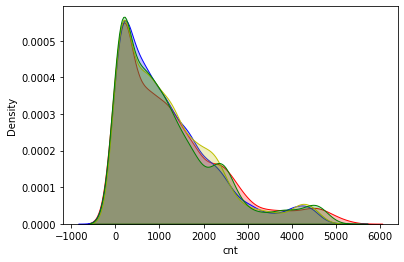

In [42]:
sns.kdeplot(compare['cnt'],shade=True,color='r')
sns.kdeplot(compare['xgb'],shade=True,color='b')
sns.kdeplot(compare['rf'],shade=True,color='y')
sns.kdeplot(compare['dnn'],shade=True,color='g')
# sns.kdeplot(compare['lgb'],shade=True,color='')

## 시계열 딥러닝

In [43]:
df=pd.read_csv("../input/london-bike-sharing-dataset/london_merged.csv",parse_dates=['timestamp'])
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [44]:
train=df.iloc[:17000,1:2]
test=df.iloc[17000:17414,1:2]

In [45]:
print(train.shape)
print(test.shape)

(17000, 1)
(414, 1)


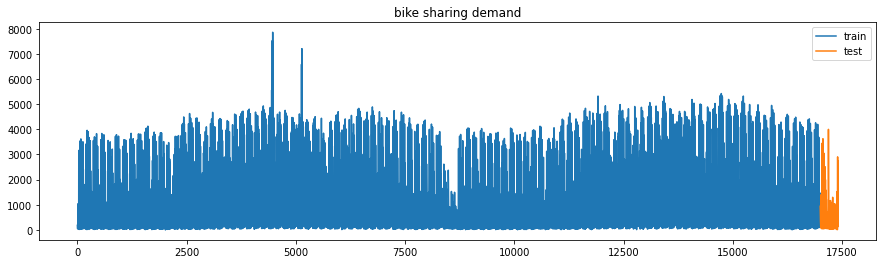

In [46]:
df['cnt'][:17000].plot(figsize=(15,4),legend=True)
df['cnt'][17000:].plot(figsize=(15,4),legend=True)
plt.legend(['train','test'])
plt.title('bike sharing demand')
plt.show()

In [47]:
from statsmodels.tsa.stattools import pacf
pacf=pacf(df['cnt'],nlags=20,method='ols')
print(pacf)

[ 1.          0.78148357 -0.41172684  0.18486682 -0.07510114 -0.09947694
 -0.08494917 -0.00403993  0.0920456   0.07065422 -0.32935188 -0.06873344
  0.05112775  0.04852911  0.06695059 -0.19621297 -0.07610221  0.14365297
 -0.11638129  0.18990804  0.16480713]


/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 20 must be < 10.

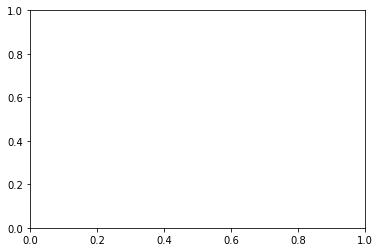

In [48]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(pacf,lags=20,methods='ols',title='pa').show()

전처리 - 스케일링 (변수간 단위차이, 정규화, 모델의 연산속도 up)

In [ ]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1)) # 0에서 1사이로 바꿈
train_scaled=sc.fit_transform(train)

In [ ]:
train_scaled

In [ ]:
# 자기 자신의 과거를 독립변수로 활용 -> 한시간 단위로 shift시켜야 함
X_train=[]
y_train=[]

for i in range(1,17000):
    X_train.append(train_scaled[i-1:i,0])
    y_train.append(train_scaled[i,0])

X_train,y_train=np.array(X_train),np.array(y_train)

In [ ]:
# 3차원 배열을 필요로 함 -> 변환 필요
X_train.shape

In [ ]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

시계열 딥러닝

In [ ]:
# RNN 모델 - 경사각 문제 생김
from keras.models import Sequential
from keras.layers.core import Dense,Activation
from keras.layers.recurrent import SimpleRNN

In [ ]:
rnn=Sequential()
rnn.add(SimpleRNN(activation='relu',units=6,input_shape=(1,1)))
rnn.add(Dense(activation='linear',units=1))

In [ ]:
print(rnn.summary())

In [ ]:
rnn.compile(loss='mse',optimizer='adam',metrics=['mse'])

In [ ]:
rnn.fit(X_train,y_train,batch_size=1,epochs=2)

In [ ]:
inputs=sc.transform(test)
inputs.shape

In [ ]:
X_test=[]
for i in range(1,415):
    X_test.append(inputs[i-1:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

In [ ]:
rnn=rnn.predict(X_test)
rnn=sc.inverse_transform(rnn)

In [ ]:
test1=pd.DataFrame(test)
rnn1=pd.DataFrame(rnn)

In [ ]:
test1.plot(figsize=(15,4),legend=True)
plt.legend(['cnt'])
plt.title("bike share demand")
plt.show()

In [ ]:
rnn1.plot(figsize=(15,4),legend=True)
plt.legend(['rnn'])
plt.title("bike share demand")
plt.show()

In [ ]:
# 한번에 나타내기
test=np.array(test)

plt.figure(figsize=(15,5))
plt.plot(test,marker=".",label="cnt",color='black')
plt.plot(rnn,marker=".",label="rnn",color="red")
plt.legend()

In [ ]:
# LSTM 모형 - memory block을 도입해 성능 up
from keras.layers.recurrent import LSTM
lstm=Sequential()
lstm.add(LSTM(units=6,activation='relu',input_shape=(1,1)))
lstm.add(Dense(units=1,activation="linear"))

In [ ]:
print(lstm.summary())

파라미터가 훨씬 많다. -> 더 정교하게 학습을 할 수 있다. (but 오버피팅 가능성)

In [ ]:
lstm.compile(loss='mse',optimizer='adam',metrics=['mse'])
lstm.fit(X_train,y_train,batch_size=1,epochs=2)

In [ ]:
lstm=lstm.predict(X_test)
lstm=sc.inverse_transform(lstm)

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(test,marker=".",label="cnt",color='black')
plt.plot(rnn,marker=".",label="rnn",color='red')
plt.plot(lstm,marker=".",label="lstm",color="green")
plt.legend()

In [ ]:
# GRU - LSTM의 과적합 문제 개선
from keras.layers.recurrent import GRU

gru=Sequential()
gru.add(GRU(units=6,activation="relu",input_shape=(1,1)))
gru.add(Dense(units=1,activation="linear"))

In [ ]:
print(gru.summary())

파라미터 수가 많이 줄었다. -> 성능은 유지하되 과적합 방지

In [ ]:
gru.compile(loss='mse',optimizer="adam",metrics=['mse'])
gru.fit(X_train,y_train,batch_size=1,epochs=2)

In [ ]:
gru=gru.predict(X_test)
gru=sc.inverse_transform(gru)

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(test,marker=".",label="cnt",color='black')
plt.plot(rnn,marker=".",label="rnn",color='red')
plt.plot(lstm,marker=".",label="lstm",color="green")
plt.plot(gru,marker=".",label="gru",color="blue")
plt.legend()

LSTM이 가장 성능이 좋음

In [ ]:
# RMSE로 비교
from sklearn.metrics import mean_squared_error

def RMSE(y_test,y_predict):
    return np.sqrt(mean_squared_error(y_test,y_predict))

In [ ]:
print("RNN RMSE:",RMSE(test,rnn))
print("LSTM RMSE:",RMSE(test,lstm))
print("GRU RMSE:",RMSE(test,gru))

epoch를 2번밖에 안해서 파라미터 조정으로 언제든 성능 바뀔 수 있음.
그래도 현재 상황에서는 LSTM>GRU>>RNN 순.